In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv("data/2020 Best movie data.csv", encoding='utf-8', thousands=',')

In [ ]:
df.drop(0)

In [8]:
df

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,배급사
1,1.0,소울,2021-01-20,7.936307e+09,50.3%,7.936307e+09,874999.0,874999.0,2018.0,63209.0,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,2.0,극장판 귀멸의 칼날: 무한열차편,2021-01-27,1.820103e+09,11.5%,1.820103e+09,206309.0,206309.0,380.0,5816.0,일본,일본,워터홀컴퍼니(주)
3,3.0,원더 우먼 1984,2020-12-23,1.445202e+09,9.2%,4.935633e+09,155562.0,546548.0,1877.0,38241.0,미국,미국,워너브러더스 코리아(주)
4,4.0,화양연화,2000-10-20,4.788446e+08,3.0%,8.788253e+08,52142.0,100156.0,447.0,12472.0,홍콩,"홍콩,프랑스",(주)디스테이션
5,5.0,세자매,2021-01-27,3.544512e+08,2.2%,3.545682e+08,42290.0,42301.0,569.0,5876.0,한국,한국,(주)리틀빅픽쳐스
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,478.0,투캅스,1993-12-18,0.000000e+00,0.0%,2.200000e+05,0.0,41.0,1.0,2.0,한국,한국,NaN
480,478.0,후쿠오카,2020-08-27,0.000000e+00,0.0%,4.403902e+07,0.0,5447.0,1.0,1.0,한국,한국,"(주)률필름,㈜인디스토리"
481,478.0,주유소 습격사건,1999-10-02,0.000000e+00,0.0%,0.000000e+00,0.0,0.0,1.0,1.0,한국,한국,(주)시네마서비스
482,478.0,야구소녀,2020-06-18,0.000000e+00,0.0%,3.193607e+08,0.0,37409.0,1.0,1.0,한국,한국,"(주)싸이더스,찬란"


In [15]:
# 개봉일을 datetime으로 고치기

df['개봉일'] = pd.to_datetime(df['개봉일'], format='%Y-%m-%d', errors='raise')
df['개봉일']

1     2021-01-20
2     2021-01-27
3     2020-12-23
4     2000-10-20
5     2021-01-27
         ...    
479   1993-12-18
480   2020-08-27
481   1999-10-02
482   2020-06-18
483   1998-05-30
Name: 개봉일, Length: 483, dtype: datetime64[ns]

In [18]:
# 조건으로 걸러내기

mask = (df['개봉일'] > '2021-01-01') & (df['관객수 '] > 10000)
df = df.loc[mask]
df

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,배급사
1,1.0,소울,2021-01-20,7.936307e+09,50.3%,7.936307e+09,874999.0,874999.0,2018.0,63209.0,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,2.0,극장판 귀멸의 칼날: 무한열차편,2021-01-27,1.820103e+09,11.5%,1.820103e+09,206309.0,206309.0,380.0,5816.0,일본,일본,워터홀컴퍼니(주)
5,5.0,세자매,2021-01-27,3.544512e+08,2.2%,3.545682e+08,42290.0,42301.0,569.0,5876.0,한국,한국,(주)리틀빅픽쳐스
6,6.0,명탐정 코난: 진홍의 수학여행,2021-01-27,3.161324e+08,2.0%,3.161324e+08,38131.0,38131.0,532.0,4670.0,일본,일본,(주)씨제이이엔엠
8,8.0,아이 엠 우먼,2021-01-14,1.775528e+08,1.1%,1.869543e+08,21913.0,22918.0,494.0,6010.0,호주,호주,(주)팝엔터테인먼트
11,11.0,블라인드,2021-01-14,1.585321e+08,1.0%,1.585321e+08,18297.0,18297.0,239.0,4359.0,네덜란드,네덜란드,주식회사 컨텐츠썬
12,12.0,#아이엠히어,2021-01-14,1.357957e+08,0.9%,1.357957e+08,16290.0,16290.0,432.0,4561.0,프랑스,프랑스,(주)넥스트엔터테인먼트월드(NEW)
13,13.0,빅풋 주니어2: 패밀리가 떴다,2021-01-06,1.216646e+08,0.8%,1.216646e+08,14682.0,14682.0,308.0,3462.0,기타,기타,(주)이수C&E
14,14.0,커넥트,2021-01-20,1.255575e+08,0.8%,1.255575e+08,14140.0,14140.0,386.0,3947.0,미국,미국,(주)이수C&E
16,16.0,미스터 존스,2021-01-07,9.459540e+07,0.6%,9.467540e+07,10727.0,10743.0,277.0,3019.0,폴란드,폴란드,(주)디오시네마


In [12]:
movie_name = df["영화명"].head(10)
movie_name

1                    소울
2     극장판 귀멸의 칼날: 무한열차편
3            원더 우먼 1984
4                  화양연화
5                   세자매
6      명탐정 코난: 진홍의 수학여행
7                    조제
8               아이 엠 우먼
9                    도굴
10                  뱅가드
Name: 영화명, dtype: object

# 새로운 DataFrame 짜기

In [74]:
# nparray or list여야 한다. not series

data = df['관객수 '].values

In [73]:
new_df = pd.DataFrame([data], columns=df['영화명'])
new_df

영화명,소울,극장판 귀멸의 칼날: 무한열차편,세자매,명탐정 코난: 진홍의 수학여행,아이 엠 우먼,블라인드,#아이엠히어,빅풋 주니어2: 패밀리가 떴다,커넥트,미스터 존스
0,874999.0,206309.0,42290.0,38131.0,21913.0,18297.0,16290.0,14682.0,14140.0,10727.0


In [80]:
new_df = new_df.reindex(range(31))

In [82]:
new_df.iloc[30] = new_df.iloc[0]

In [84]:
new_df.iloc[0] = None

In [102]:
new_df.loc['날짜'] = None

In [104]:
new_df = new_df.drop('영화명', axis=1)

In [106]:
new_df = new_df.drop('날짜')

In [112]:
# datetime 만들기

dti = pd.Series(pd.date_range("2021", freq="D", periods=31))

In [113]:
new_df['날짜'] = dti

In [114]:
new_df.set_index('날짜')

영화명,소울,극장판 귀멸의 칼날: 무한열차편,세자매,명탐정 코난: 진홍의 수학여행,아이 엠 우먼,블라인드,#아이엠히어,빅풋 주니어2: 패밀리가 떴다,커넥트,미스터 존스
날짜,,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 함수화

In [118]:
def refineData(df, numday) :
    df.drop(0)
    df['개봉일'] = pd.to_datetime(df['개봉일'], format='%Y-%m-%d', errors='raise')
    mask = (df['개봉일'] > '2021-01-01') & (df['관객수 '] > 10000)
    df = df.loc[mask]
    data = df['관객수 '].values
    new_df = pd.DataFrame([data], columns=df['영화명'])
    new_df = new_df.reindex(range(numday))
    new_df.iloc[numday-1] = new_df.iloc[0]
    new_df.iloc[0] = None
    dti = pd.Series(pd.date_range("2021", freq="D", periods=31))
    new_df['날짜'] = dti
    new_df.set_index('날짜')
    
    return new_df

In [121]:
refineData(df, 31)

영화명,소울,극장판 귀멸의 칼날: 무한열차편,세자매,명탐정 코난: 진홍의 수학여행,아이 엠 우먼,블라인드,#아이엠히어,빅풋 주니어2: 패밀리가 떴다,커넥트,미스터 존스,날짜
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-02
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-03
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-05
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-07
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-08
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-09
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-10


# Plot test

In [139]:
inter_value = np.interp(np.arange(0, 120) , [0, 120], [0, 874999])

In [140]:
inter_value

array([     0.        ,   7291.65833333,  14583.31666667,  21874.975     ,
        29166.63333333,  36458.29166667,  43749.95      ,  51041.60833333,
        58333.26666667,  65624.925     ,  72916.58333333,  80208.24166667,
        87499.9       ,  94791.55833333, 102083.21666667, 109374.875     ,
       116666.53333333, 123958.19166667, 131249.85      , 138541.50833333,
       145833.16666667, 153124.825     , 160416.48333333, 167708.14166667,
       174999.8       , 182291.45833333, 189583.11666667, 196874.775     ,
       204166.43333333, 211458.09166667, 218749.75      , 226041.40833333,
       233333.06666667, 240624.725     , 247916.38333333, 255208.04166667,
       262499.7       , 269791.35833333, 277083.01666667, 284374.675     ,
       291666.33333333, 298957.99166667, 306249.65      , 313541.30833333,
       320832.96666667, 328124.625     , 335416.28333333, 342707.94166667,
       349999.6       , 357291.25833333, 364582.91666667, 371874.575     ,
       379166.23333333, 3

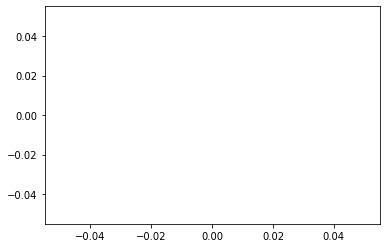

In [144]:
fig, ax = plt.subplots() 
xdata1, ydata1 = [], []
ln1
, = ax.plot(x, y, ls='-', lw=1, color='b')

In [ ]:
#init = 초기 그래프 설정값을 만듬 (이것은 변하지 않는다.)
def init() :
    ax.set_xlim(0, 1000000)
    ax.set_ylim
    return ln1, ln2